# Student Performace Indicator (Model Training)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## models
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
print('Imported')

Imported


In [69]:
df = pd.read_csv('Data/students.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [70]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [71]:
## dependent and independent variables distribution
### Let's take average score is dependent variables
y = df['total_score']
x = df.drop(columns='total_score', axis=1)

In [72]:
x.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [73]:
cat_col = [feature for feature in df.columns if df[feature].dtypes == 'object']
num_col = [feature for feature in df.columns if df[feature].dtypes != 'object']

In [74]:
for col in cat_col:
    print('='*50)
    print(f'Categorical Variables present in [{col}]:')
    print(df[col].value_counts())
    print('='*50)

Categorical Variables present in [gender]:
gender
female    518
male      482
Name: count, dtype: int64
Categorical Variables present in [race/ethnicity]:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Categorical Variables present in [parental level of education]:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Categorical Variables present in [lunch]:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Categorical Variables present in [test preparation course]:
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [75]:
## one-hot-encoding and label encoding for the categorical values
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = x.select_dtypes(exclude='object').columns
categorical_features = x.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, categorical_features),
        ('StandardSCaler', numeric_transformer, numeric_features)
    ]
)

In [76]:
## fit transforming x values
x = preprocessor.fit_transform(x)

In [77]:
## train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((670, 20), (330, 20), (670,), (330,))

#### Create an Evaluation Function to give all metrics after model training

In [78]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mae, mse, r2

In [79]:
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(),
    'Lasso Regression' : Lasso(),
    'Elastic Net Regresion' : ElasticNet(),
    'K Nearest Neighbors' : KNeighborsRegressor(),
    'Support Vector Regressor' : SVR(),
    'Decsion Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'Cat Boost Regressor' : CatBoostRegressor(verbose=False),
    'Extra Gradient Boost Regressor' : XGBRegressor()
}

model_list = []
r2_list = []
results = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    ## making prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    ## evaluating train and test datset
    model_train_mae, model_train_mse, model_train_r2 = evaluate(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_r2 = evaluate(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('='*50)
    print('Model Performace for Training Set')
    print(f'-- Mean Squared Error {np.round(model_train_mse)}')
    print(f'-- Mean Absolute Error {np.round(model_train_mae)}')
    print(f'-- R2 Score {np.round(model_train_r2)}')
    print('-'*50)
    print('Model Performace for Testing Set')
    print(f'-- Mean Squared Error {np.round(model_test_mse)}')
    print(f'-- Mean Absolute Error {np.round(model_test_mae)}')
    print(f'-- R2 Score {np.round(model_test_r2)}')
    print('='*50)
    r2_list.append(model_test_r2)
    

Linear Regression
Model Performace for Training Set
-- Mean Squared Error 0.0
-- Mean Absolute Error 0.0
-- R2 Score 1.0
--------------------------------------------------
Model Performace for Testing Set
-- Mean Squared Error 0.0
-- Mean Absolute Error 0.0
-- R2 Score 1.0
Ridge Regression
Model Performace for Training Set
-- Mean Squared Error 0.0
-- Mean Absolute Error 0.0
-- R2 Score 1.0
--------------------------------------------------
Model Performace for Testing Set
-- Mean Squared Error 0.0
-- Mean Absolute Error 0.0
-- R2 Score 1.0
Lasso Regression
Model Performace for Training Set
-- Mean Squared Error 1.0
-- Mean Absolute Error 1.0
-- R2 Score 1.0
--------------------------------------------------
Model Performace for Testing Set
-- Mean Squared Error 1.0
-- Mean Absolute Error 1.0
-- R2 Score 1.0
Elastic Net Regresion
Model Performace for Training Set
-- Mean Squared Error 52.0
-- Mean Absolute Error 6.0
-- R2 Score 1.0
--------------------------------------------------
Mod

In [80]:
# Display the DataFrame
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
0,Linear Regression,1.000000
1,Ridge Regression,1.000000
2,Lasso Regression,0.999325
8,Gradient Boost Regressor,0.996105
10,Extra Gradient Boost Regressor,0.994508
7,Random Forest Regressor,0.992998
9,Cat Boost Regressor,0.992927
6,Decsion Tree Regressor,0.981525
3,Elastic Net Regresion,0.969902
4,K Nearest Neighbors,0.959124


## Linear Regression Model

In [81]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)
print(f'Accuracy of the test data is {score}')

Accuracy of the test data is 1.0


## Plot y_pred and y_test

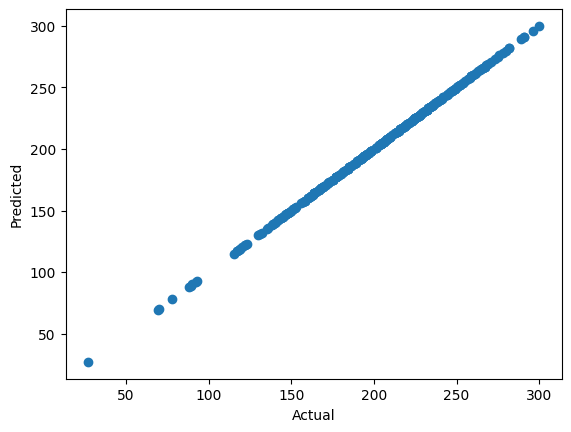

In [83]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [84]:
pred_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,261,261.0,0.000000e+00
737,192,192.0,-2.842171e-14
740,225,225.0,0.000000e+00
660,224,224.0,-2.842171e-14
411,245,245.0,0.000000e+00
...,...,...,...
506,204,204.0,2.842171e-14
342,219,219.0,0.000000e+00
485,215,215.0,0.000000e+00
711,250,250.0,-2.842171e-14
